# **Probability & Statistics — Day 2**

**Goals today:**
- Bernoulli & Binomial basics
- Central Limit Theorem (CLT) intuition via simulation
- Bayes’ rule on a simple diagnostic example

In [5]:
import sys, os, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", plt.matplotlib.__version__)

# Reproducibility
rng = np.random.default_rng(42)

# Make sure ../figures exists (relative to this notebook)
os.makedirs("../figures", exist_ok=True)

# Simple, readable plotting defaults
plt.rcParams.update({
    "figure.figsize": (5, 4),
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False
})


Python: 3.13.7
NumPy: 2.3.2
Pandas: 2.3.2
Matplotlib: 3.10.6


**Bernoulli & Binomial**

We’ll sample Bernoulli trials with probability 𝑝 = 0.3 and summarize the empirical mean/variance. Then we’ll draw Binomial counts and visualize the distribution.

Bernoulli mean (≈ p): 0.2942
Bernoulli var (≈ p(1-p)): 0.20764636


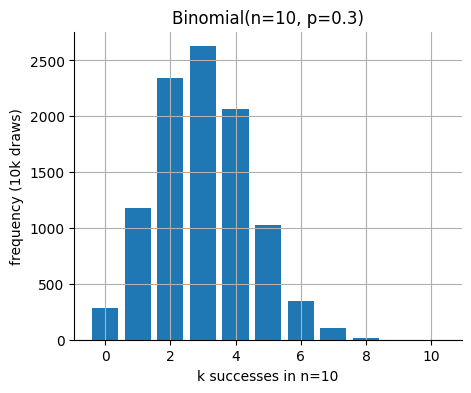

In [6]:
# Bernoulli(p=0.3) — 10k trials
p = 0.3
n_trials = 10_000
bernoulli = rng.binomial(1, p, size=n_trials)

print("Bernoulli mean (≈ p):", bernoulli.mean())
print("Bernoulli var (≈ p(1-p)):", bernoulli.var())

# Binomial(n=10, p=0.3) — 10k draws
n = 10
binom = rng.binomial(n, p, size=n_trials)

# Plot
fig, ax = plt.subplots()
ax.hist(binom, bins=range(n+2), align="left", rwidth=0.8)
ax.set_xlabel("k successes in n=10")
ax.set_ylabel("frequency (10k draws)")
ax.set_title("Binomial(n=10, p=0.3)")
plt.show()

fig.savefig("../figures/day2_binomial_hist.png", dpi=150, bbox_inches="tight")


**Central Limit Theorem (CLT) via simulation**

Take many samples from a skewed distribution (Exponential). As the sample size 𝑛 grows, the distribution of sample means approaches Normal (mean 𝜇, variance 𝜎<sup>2</sup>/𝑛 σ2/n).

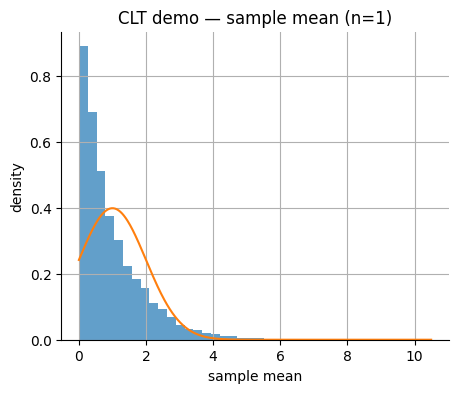

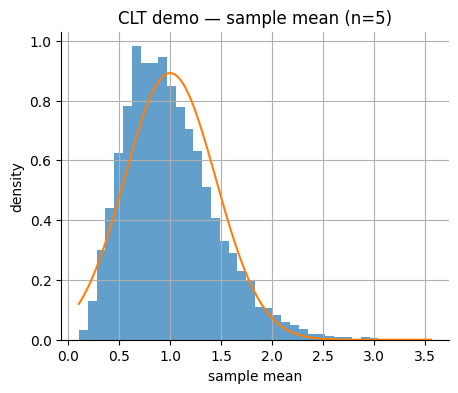

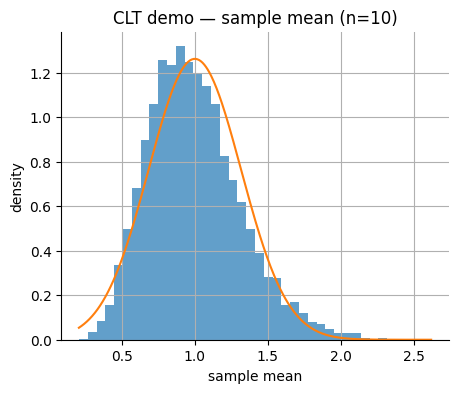

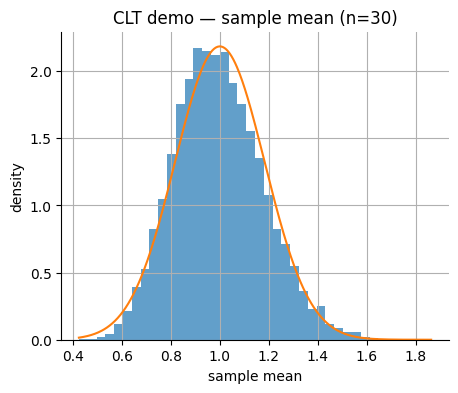

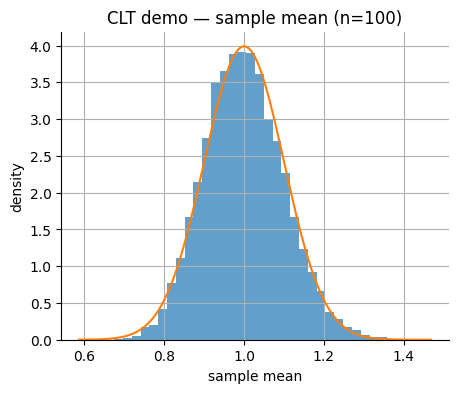

In [7]:
# CLT with Exponential(λ=1) → mean=1, var=1
lam = 1.0
mu, var = 1.0, 1.0
sample_sizes = [1, 5, 10, 30, 100]

for n in sample_sizes:
    means = rng.exponential(scale=1/lam, size=(10_000, n)).mean(axis=1)
    fig, ax = plt.subplots()
    ax.hist(means, bins=40, density=True, alpha=0.7)
    
    # Overlay Normal(mu, var/n)
    xs = np.linspace(means.min(), means.max(), 400)
    sigma = math.sqrt(var / n)
    normal_pdf = (1/(sigma*math.sqrt(2*math.pi))) * np.exp(-0.5*((xs-mu)/sigma)**2)
    ax.plot(xs, normal_pdf)
    
    ax.set_title(f"CLT demo — sample mean (n={n})")
    ax.set_xlabel("sample mean")
    ax.set_ylabel("density")
    plt.show()
    
    fig.savefig(f"../figures/day2_clt_n{n}.png", dpi=150, bbox_inches="tight")


**Bayes’ rule (diagnostic test)**

Given prevalence, sensitivity, and specificity, compute the posterior probability you’re actually positive given a positive test result (PPV) and negative given negative result (NPV).

In [8]:
prevalence = 0.01      # 1%
sensitivity = 0.95     # P(test + | disease)
specificity = 0.98     # P(test - | no disease)

# PPV = P(disease | +)
ppv = (sensitivity*prevalence)/((sensitivity*prevalence) + (1-specificity)*(1-prevalence))

# NPV = P(no disease | -)
npv = (specificity*(1-prevalence))/(((1-sensitivity)*prevalence) + (specificity*(1-prevalence)))

print(f"PPV given +: {ppv:.3f}")
print(f"NPV given -: {npv:.3f}")


PPV given +: 0.324
NPV given -: 0.999


In [9]:
import sys, numpy as np, pandas as pd
print('Python:', sys.version.split()[0])

Python: 3.13.7
